For this 7th tutorial we will study climate model output for different cities in the world, and look at how extreme temperature and precipitation changes over time and depending on emission scenarios

In [1]:
# <Yosmely Bermúdez> comments
# Mount Google Drive locally
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd gdrive/Shareddrives/Academy/Courses/Climate/Climatematch/02-Curriculum/Climatematch\ Content\ Folder/W2D4\ -\ Climate\ Response\ -\ Extremes\ \&\ Variability/W2D4\ Tutorials

/content/gdrive/Shareddrives/Academy/Courses/Climate/Climatematch/02-Curriculum/Climatematch Content Folder/W2D4 - Climate Response - Extremes & Variability/W2D4 Tutorials


In [3]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [4]:
#install dependencies - taken from <Yosmely Bermúdez> comments for Tutorial 6
# We need this to install eigen which is needed for SDFC to install correctly
!mamba install eigen numpy matplotlib seaborn pandas cartopy scipy texttable intake xarrayutils xmip cf_xarray intake-esm
!pip install -v https://github.com/yrobink/SDFC/archive/master.zip#subdirectory=python
!pip install https://github.com/njleach/mystatsfunctions/archive/master.zip



                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.1) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['eigen', 'numpy', 'matplotlib', 'seaborn', 'pandas', 'cartopy', 'scipy', 'texttable', 'intake', 'xa

In [5]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cartopy.crs as ccrs
from scipy import stats

/usr/local/lib/python3.10/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [6]:
import extremes_functions as ef
from mystatsfunctions import OLSE,LMoments
import SDFC as sd

In [7]:
gev = stats.genextreme

In [8]:
def estimate_return_level(quantile,model):
    loc, scale, shape = model.coef_
    level = loc - scale / shape * (1 - (-np.log(quantile))**(-shape))
    # level = stats.genextreme.ppf(quantile,-shape,loc=loc,scale=scale)
    return level

## Load CMIP6 data

## Shortcut

In [9]:
# data = xr.open_dataset('cmip6_data_city_daily_scenarios.nc')
data = xr.open_dataset('cmip6_data_city_daily_scenarios_tasmax_pr_models.nc') 

## Through pangeo

The code below recreates the data loaded in the previous line.

In this way you can access large amounts of climate model output that has been stored in the cloud. This is very useful to get easy access to such information. Feel free to modify the code to access different data and address your own questions.

The code blocks below have been commented out as they are NOT NECESSARY for this tutorial to run. Please DO NOT run it straightaway, the code take quite long to run and consumes resources. However, the code is provided to give a better idea of how data can be obtained through Pangeo - which is an immensely valuable resource!

In [ ]:
# import intake 
# import intake_esm
# from xmip.preprocessing import combined_preprocessing
# from xarrayutils.plotting import shaded_line_plot

# from xmip.utils import google_cmip_col
# # we could do all of this with pure pandas on the underlying csv file
# col = google_cmip_col()

In [ ]:
# cat = col.search(
#     # source_id=['IPSL-CM6A-LR', 'GFDL-ESM4', 'ACCESS-CM2', 'MPI-ESM1-2-LR', 'TaiESM1'],
#     # source_id=['CESM2','MPI-ESM1-2-HR'],
#     source_id='MPI-ESM1-2-HR',
#     variable_id=['pr','tas'],
#     member_id='r1i1p1f1', #
#     table_id='day',
#     grid_label='gn',
#     experiment_id = ['historical','ssp126', 'ssp245', 'ssp585'],
#     # experiment_id = ['historical', 'ssp126', 'ssp585'],
#     # require_all_on = ['source_id']
# )
# kwargs = dict(preprocess=combined_preprocessing, xarray_open_kwargs=dict(use_cftime=True))
# ds_dict = cat.to_dataset_dict(zarr_kwargs={'consolidated': True})

Define one or more locations

In [ ]:
# sel_Hamburg = dict(lon=10,lat=53.5)
# sel_Madrid = dict(lon=360-42,lat=40.5)
# sel_Delhi = dict(lon=77,lat=28.5)
# sel_Kinshasa = dict(lon=15,lat=-4)
# sel_Phoenix = dict(lon=360-112,lat=33.5)
# sel_Sydney = dict(lon=151,lat=-33.85)

# sels = dict(
#     Hamburg = sel_Hamburg,
#     Madrid = sel_Madrid,
#     Delhi = sel_Delhi,
#     Kinshasa = sel_Kinshasa,
#     Phoenix = sel_Phoenix,
#     Sydney = sel_Sydney
# )

Assemble your data

In [ ]:
# model = 'MPI-ESM1-2-HR'
# scenarios = ['ssp126','ssp245','ssp585']
# outs = []
# for city in sels.keys():
#     outis = []
#     for scenario in scenarios:
#         timeseries = xr.concat(
#                     [
#                         ds_dict['%s.%s' % (model, 'historical')].sel(sels[city],method='nearest').sel(time=slice('2014')),
#                         ds_dict['%s.%s' % (model, scenario)].sel(sels[city],method='nearest')
#                     ],'time'
#                     )
#         timeseries = timeseries.assign_coords(city=city,scenario=scenario).squeeze()
#         outis.append(timeseries)
#         # outis.append(ds_dict[key].sel(sels[city],method='nearest').assign_coords(city=city,scenario=key).squeeze())
#     outs.append(xr.concat(outis,'scenario'))
# data = xr.concat(outs,'city')

In [ ]:
# print('The data has %.3f MB' % data.nbytes / 1e6)
# with ProgressBar():
#     data.load()

## Processing

Look at the data for one selected city, for one climate model

In [10]:
city = 'Madrid'

In [11]:
data_city = data.sel(city=city,model='MPI-ESM1-2-HR')

In [12]:
data_city

<xarray.Dataset>
Dimensions:         (time: 91676, scenario: 3, bnds: 2)
Coordinates:
  * time            (time) datetime64[ns] 1850-01-01T12:00:00 ... 2100-12-31T...
    city            <U6 'Madrid'
  * scenario        (scenario) object 'ssp126' 'ssp245' 'ssp585'
    lat             float64 ...
    lat_bnds        (bnds) float64 ...
    lon             float64 ...
    lon_bnds        (bnds) float64 ...
    time_bnds       (time, bnds) datetime64[ns] ...
    member_id       object ...
    dcpp_init_year  float64 ...
    height          float64 ...
    model           <U13 'MPI-ESM1-2-HR'
Dimensions without coordinates: bnds
Data variables:
    pr              (scenario, time) float64 ...
    tasmax          (scenario, time) float32 ...
Attributes: (12/56)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             0.0
    branch_time_in_parent:            0.0
    cmor_version:                     3.5.0
    ...                               ...
    intake_esm_attrs:member_id:       r1i1p1f1
    intake_esm_attrs:table_id:        day
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         20190710
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.MPI-M.MPI-ESM1-2-HR.historical.day.gn

The data is has daily resolution, for three climate scenarios - those start in 2014, so until 2014 they are the same and then diverge

Text(0.5, 1.0, 'Precipitation')

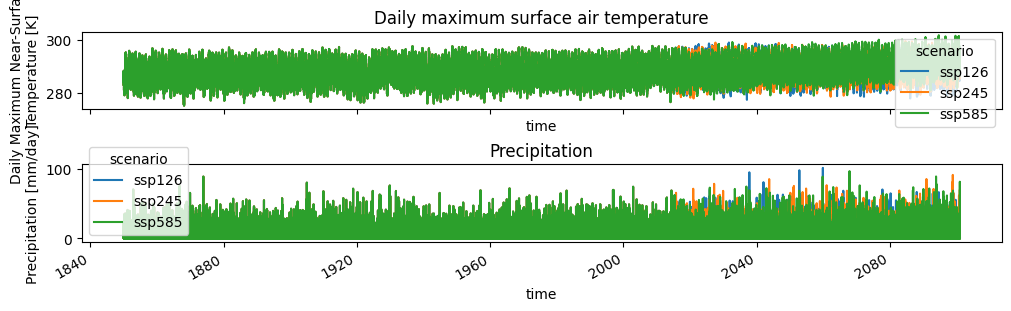

In [13]:
fig, ax = plt.subplots(2,sharex=True,figsize=(10,3),constrained_layout=True)
data_city['tasmax'].plot(hue='scenario',ax=ax[0])
data_city['pr'].plot(hue='scenario',ax=ax[1])

ax[0].set_title('Daily maximum surface air temperature')
ax[1].set_title('Precipitation')

Do the same with a 30-year rolling mean

Text(0.5, 1.0, 'Precipitation')

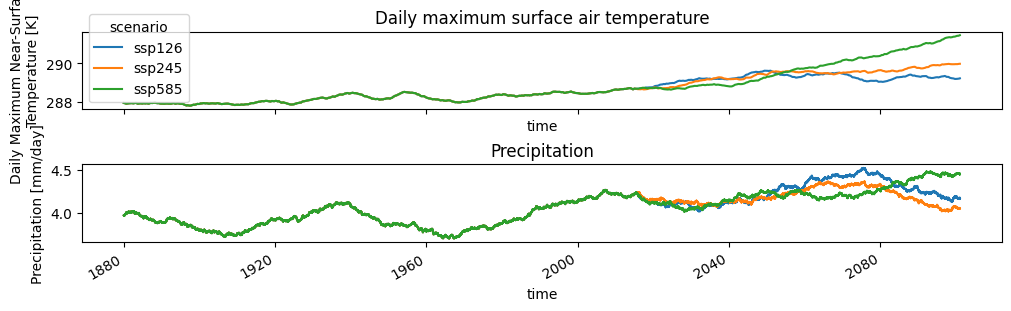

In [14]:
fig, ax = plt.subplots(2,sharex=True,figsize=(10,3),constrained_layout=True)
data_city['tasmax'].rolling(time=30*365).mean().plot(hue='scenario',ax=ax[0])
data_city['pr'].rolling(time=30*365).mean().plot(hue='scenario',ax=ax[1],add_legend=False)

ax[0].set_title('Daily maximum surface air temperature')
ax[1].set_title('Precipitation')


In the previous tutorials we have been operating on annual maxima data. That is want to take the day in each year with the highest temperature or the largest amount of rainfall

Let's focus on precipitation for now, and compute the maximum for each year

In [16]:
pr_city = data_city['pr']
pr_city_max= pr_city.resample(time='1Y').max()

In [17]:
pr_city.groupby('time.year').max()

<xarray.DataArray 'pr' (scenario: 3, year: 251)>
array([[ 35.63326579,  40.72365761,  69.9846385 ,  44.36128121,
         34.34129935,  52.91912556,  51.11084227,  33.96195117,
         49.62599315,  44.51078251,  37.4308018 ,  43.83184835,
         48.57165869,  51.68603025,  40.57697263,  49.98616017,
         75.14230013,  42.33099148,  52.49345899,  65.09861592,
         46.79957516,  43.5016701 ,  47.72616439,  88.49641196,
         49.24112298,  44.25696172,  35.27506012,  55.01112789,
         30.01829926,  48.81657287,  41.73806068,  38.04536797,
         56.77314308,  50.41259117,  28.978494  ,  53.40563469,
         55.7289876 ,  54.22027521,  34.94645599,  45.77392191,
         32.38238571,  37.43649982,  54.6244774 ,  40.50830975,
         39.40459918,  43.5695434 ,  39.8866877 ,  57.63029493,
         27.81989537,  37.16394547,  42.47602187,  46.22439221,
         52.63586417,  40.70582427,  79.80849892,  65.38098715,
         41.78442936,  48.73665478,  32.19804503,  67.48396307,
         46.88663967,  53.14973686,  53.80159914,  45.04411295,
         46.89428899,  57.64330029,  55.23895305,  51.84184313,
         71.11122161,  45.07709909,  66.27836209,  58.28605983,
         52.96700802,  36.71221789,  67.98486561,  32.14429859,
         62.7524307 ,  61.25752833,  41.17272478,  75.68872143,
...
         55.06648365,  57.02562612,  38.0312562 ,  72.62887582,
         50.3129689 ,  62.21046522,  46.54481895,  59.45725646,
         53.31937987,  40.69690257,  50.72572064,  70.79433538,
         58.97582173,  61.96888536,  74.20770954,  68.92026588,
         51.87779143,  48.0929397 ,  63.72468453,  40.28953202,
         71.87903076,  65.52867293,  61.1143738 ,  54.15171795,
         36.90703176,  58.54520146,  59.95138474,  61.6545137 ,
         46.22173682,  37.41320483,  68.28540713,  58.27620775,
         48.24529756,  61.58690695,  61.60206981,  41.04631729,
         41.31990261,  88.40256818,  40.54193459,  67.20957812,
         73.46010245,  63.2148955 ,  45.10763101,  59.02124494,
         42.02669822,  96.30657881,  65.83536007,  60.70779786,
         75.90061426,  51.78817213,  54.58905715,  66.93474557,
         51.05931871,  59.24123973,  44.02720537,  64.2287001 ,
         62.49352545,  63.18030506,  43.98257174,  39.14746419,
         63.55027892,  57.10137002,  58.33831765,  50.56825317,
         68.8283734 ,  73.22693132,  56.94195125,  59.67182983,
         70.71446255,  71.4476008 ,  46.16987631,  88.65313008,
         77.13025957,  48.72280452,  67.50062462,  61.43518779,
         68.406187  ,  45.84847391,  81.09798599]])
Coordinates:
    city            <U6 'Madrid'
  * scenario        (scenario) object 'ssp126' 'ssp245' 'ssp585'
    lat             float64 ...
    lon             float64 ...
    member_id       object ...
    dcpp_init_year  float64 ...
    height          float64 ...
    model           <U13 'MPI-ESM1-2-HR'
  * year            (year) int64 1850 1851 1852 1853 ... 2097 2098 2099 2100
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        includes both liquid and solid phases
    history:        2019-08-25T06:42:13Z altered by CMOR: replaced missing va...
    long_name:      Precipitation
    original_name:  pr
    standard_name:  precipitation_flux
    units:          mm/day

Text(0.5, 1.0, 'Annual maximum precipitation')

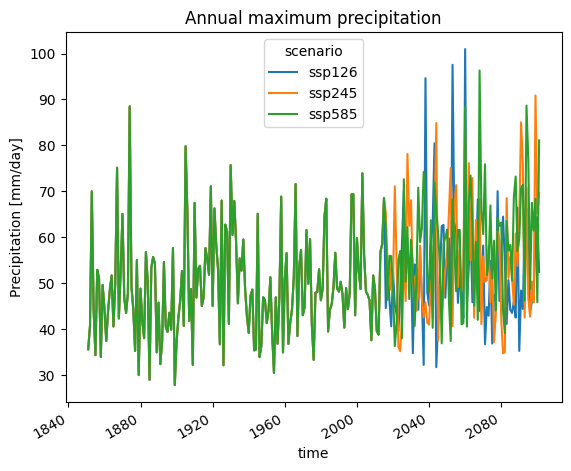

In [18]:
fig, ax = plt.subplots()
pr_city_max.plot(hue='scenario',ax=ax)

ax.set_title('Annual maximum precipitation')


Repeat the previous analysis: take the historical run (1850-2014), look at three 30-year periods, and compute Extreme Values. Change the periods because the historical run ends in 2014. Therefore just select one of the scenarios.

In [19]:
data_period1 = pr_city_max.sel(scenario='ssp245',time=slice('2014')).sel(time=slice('1925','1954')).to_pandas()
data_period2 = pr_city_max.sel(scenario='ssp245',time=slice('2014')).sel(time=slice('1955','1984')).to_pandas()
data_period3 = pr_city_max.sel(scenario='ssp245',time=slice('2014')).sel(time=slice('1985','2015')).to_pandas()

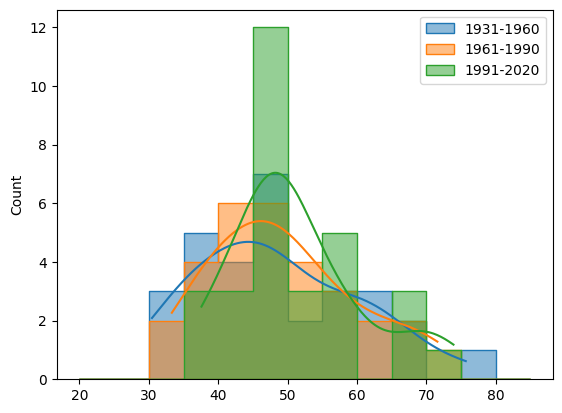

In [20]:
sns.histplot(data_period1,bins=np.arange(20,90,5),color='C0',element='step',alpha=0.5,kde=True,label='1931-1960')
sns.histplot(data_period2,bins=np.arange(20,90,5),color='C1',element='step',alpha=0.5,kde=True,label='1961-1990')
sns.histplot(data_period3,bins=np.arange(20,90,5),color='C2',element='step',alpha=0.5,kde=True,label='1991-2020')
plt.legend()

In [21]:
periods_stats = pd.DataFrame(index=['Mean','Standard Deviation','Skew'])
periods_stats['1931-1960'] = [data_period1.mean(), data_period1.std(), data_period1.skew()]
periods_stats['1961-1990'] = [data_period2.mean(), data_period2.std(), data_period2.skew()]
periods_stats['1991-2020'] = [data_period3.mean(), data_period3.std(), data_period3.skew()]

periods_stats = periods_stats.T
periods_stats

,Mean,Standard Deviation,Skew
1931-1960,48.430939,11.521903,0.485490
1961-1990,49.461359,10.390394,0.547118
1991-2020,51.412866,9.354812,0.905246


In [22]:
fit_period1, model_period1 = ef.fit_return_levels_sdfc(data_period1.values,times=np.arange(1.1,1000),periods_per_year=1,kind='GEV',N_boot=1000,full=True,model=True)
fit_period2, model_period2 = ef.fit_return_levels_sdfc(data_period2.values,times=np.arange(1.1,1000),periods_per_year=1,kind='GEV',N_boot=1000,full=True,model=True)
fit_period3, model_period3 = ef.fit_return_levels_sdfc(data_period3.values,times=np.arange(1.1,1000),periods_per_year=1,kind='GEV',N_boot=1000,full=True,model=True)

Text(0, 0.5, 'Density')

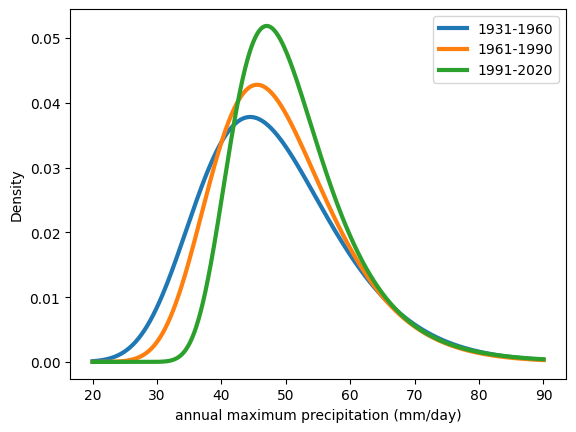

In [23]:
fig, ax = plt.subplots()
x = np.linspace(20,90,1000)
ax.plot(x,gev.pdf(
    x, 
    -model_period1.shape.mean(), 
    loc=model_period1.loc.mean(), 
    scale=model_period1.scale.mean()
    ),
    c='C0',lw=3,label='1931-1960')
ax.plot(x,gev.pdf(
    x, 
    -model_period2.shape.mean(), 
    loc=model_period2.loc.mean(), 
    scale=model_period2.scale.mean()
    ),
    c='C1',lw=3,label='1961-1990')
ax.plot(x,gev.pdf(
    x, 
    -model_period3.shape.mean(), 
    loc=model_period3.loc.mean(), 
    scale=model_period3.scale.mean()
    ),
    c='C2',lw=3,label='1991-2020')
ax.legend()
ax.set_xlabel('annual maximum precipitation (mm/day)')
ax.set_ylabel('Density')

In [24]:
parameters = pd.DataFrame(index=['Location', 'Scale', 'Shape'])
parameters['1931-1960'] = [model_period1.loc.mean(), model_period1.scale.mean(), model_period1.shape.mean()]
parameters['1961-1990'] = [model_period2.loc.mean(), model_period2.scale.mean(), model_period2.shape.mean()]
parameters['1991-2020'] = [model_period3.loc.mean(), model_period3.scale.mean(), model_period3.shape.mean()]

parameters = parameters.T
parameters.round(4)#.astype('%.2f')

,Location,Scale,Shape
1931-1960,43.5183,9.7693,-0.0931
1961-1990,44.9420,8.6152,-0.0673
1991-2020,47.1615,7.0916,0.0181


# Scenarios

Now let's look at hot days in possible climate futures: the years 2050-2080

In [28]:
data_city = data.sel(city=city,model='MPI-ESM1-2-HR')
# data_city = data.sel(city=city,model='ACCESS-CM2')

In [29]:
tasmax_city_fut = data_city['tasmax'].sel(time=slice('2050','2079')).resample(time='1Y').max()

<Axes: xlabel='tasmax', ylabel='Count'>

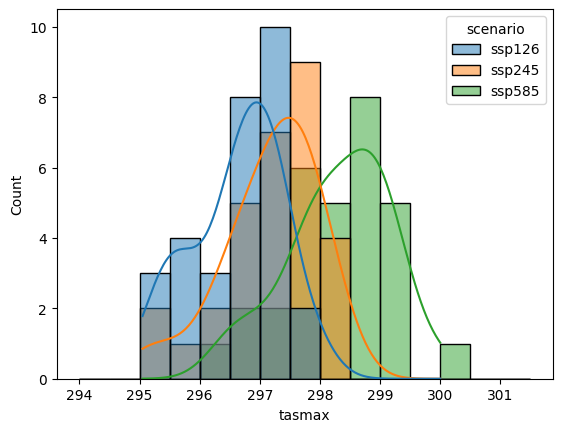

In [30]:
sns.histplot(data=tasmax_city_fut.to_dataframe()['tasmax'].reset_index(),x='tasmax',hue='scenario',kde=True,bins=np.arange(294,302,0.5))#.plot.hist(hue='scenario')

In [31]:
data_period1 = tasmax_city_fut.sel(scenario='ssp126').to_pandas()
data_period2 = tasmax_city_fut.sel(scenario='ssp245').to_pandas()
data_period3 = tasmax_city_fut.sel(scenario='ssp585').to_pandas()

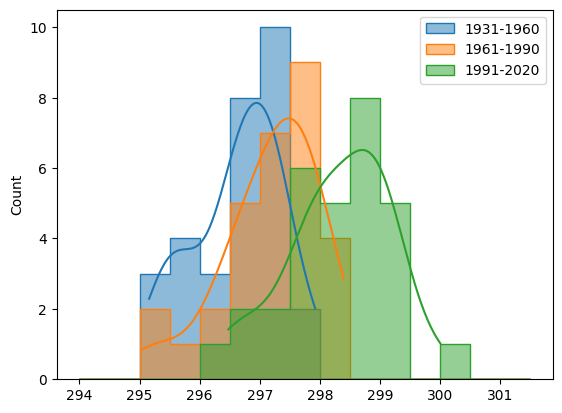

In [32]:
sns.histplot(data_period1,bins=np.arange(294,302,0.5),color='C0',element='step',alpha=0.5,kde=True,label='1931-1960')
sns.histplot(data_period2,bins=np.arange(294,302,0.5),color='C1',element='step',alpha=0.5,kde=True,label='1961-1990')
sns.histplot(data_period3,bins=np.arange(294,302,0.5),color='C2',element='step',alpha=0.5,kde=True,label='1991-2020')
plt.legend()

In [33]:
periods_stats = pd.DataFrame(index=['Mean','Standard Deviation','Skew'])
periods_stats['1931-1960'] = [data_period1.mean(), data_period1.std(), data_period1.skew()]
periods_stats['1961-1990'] = [data_period2.mean(), data_period2.std(), data_period2.skew()]
periods_stats['1991-2020'] = [data_period3.mean(), data_period3.std(), data_period3.skew()]

periods_stats = periods_stats.T
periods_stats

,Mean,Standard Deviation,Skew
1931-1960,296.625397,0.739081,-0.424184
1961-1990,297.182892,0.798788,-0.906828
1991-2020,298.318817,0.849547,-0.473855


In [34]:
fit_period1, model_period1 = ef.fit_return_levels_sdfc(data_period1.values,times=np.arange(1.1,1000),periods_per_year=1,kind='GEV',N_boot=1000,full=True,model=True)
fit_period2, model_period2 = ef.fit_return_levels_sdfc(data_period2.values,times=np.arange(1.1,1000),periods_per_year=1,kind='GEV',N_boot=1000,full=True,model=True)
fit_period3, model_period3 = ef.fit_return_levels_sdfc(data_period3.values,times=np.arange(1.1,1000),periods_per_year=1,kind='GEV',N_boot=1000,full=True,model=True)

Text(0, 0.5, 'Density')

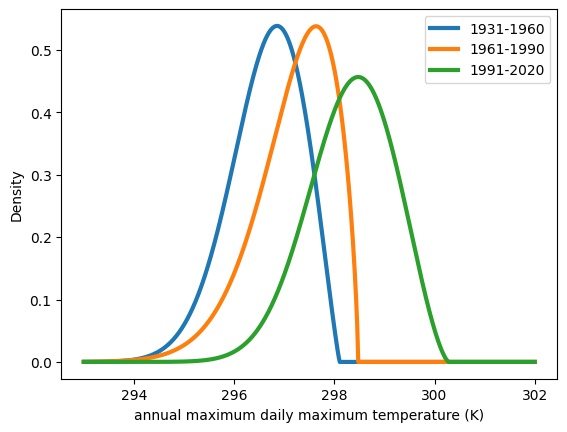

In [35]:
fig, ax = plt.subplots()
x = np.linspace(293,302,1000)
ax.plot(x,gev.pdf(
    x, 
    -model_period1.shape.mean(), 
    loc=model_period1.loc.mean(), 
    scale=model_period1.scale.mean()
    ),
    c='C0',lw=3,label='1931-1960')
ax.plot(x,gev.pdf(
    x, 
    -model_period2.shape.mean(), 
    loc=model_period2.loc.mean(), 
    scale=model_period2.scale.mean()
    ),
    c='C1',lw=3,label='1961-1990')
ax.plot(x,gev.pdf(
    x, 
    -model_period3.shape.mean(), 
    loc=model_period3.loc.mean(), 
    scale=model_period3.scale.mean()
    ),
    c='C2',lw=3,label='1991-2020')
ax.legend()
ax.set_xlabel('annual maximum daily maximum temperature (K)')
ax.set_ylabel('Density')

In [36]:
parameters = pd.DataFrame(index=['Location', 'Scale', 'Shape'])
parameters['1931-1960'] = [model_period1.loc.mean(), model_period1.scale.mean(), model_period1.shape.mean()]
parameters['1961-1990'] = [model_period2.loc.mean(), model_period2.scale.mean(), model_period2.shape.mean()]
parameters['1991-2020'] = [model_period3.loc.mean(), model_period3.scale.mean(), model_period3.shape.mean()]

parameters = parameters.T
parameters.round(4)#.astype('%.2f')

,Location,Scale,Shape
1931-1960,296.4340,0.7785,-0.4651
1961-1990,297.0309,0.8615,-0.5971
1991-2020,298.0697,0.8841,-0.3985


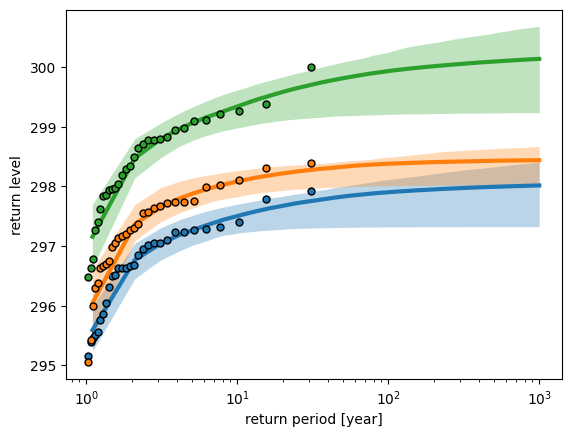

In [37]:
ef.plot_levels_from_obj(fit_period1,alpha=0.95)
ef.plot_levels_from_obj(fit_period2,alpha=0.95,ax=plt.gca(),c='C1')
ef.plot_levels_from_obj(fit_period3,alpha=0.95,ax=plt.gca(),c='C2')
# plt.xlim(1.5,1000)
# plt.ylim(0,None)
# plt.semilogx()

# Potential add-on: spatial analysis

TBD